### Reference

Medium post: [Introduction to nuScenes dataset for autonomous driving](https://medium.com/@msayef/introduction-to-nuscenes-dataset-for-autonomous-driving-2feb7a7e6957)

## A Gentle Introduction to nuScenes

In this part of the tutorial, let us go through a top-down introduction of our database. Our dataset comprises of elemental building blocks that are the following:

1. `log`                - Log information from which the data was extracted.
2. `scene`              - 20 second snippet of a car's journey.
3. `sample`             - An annotated snapshot of a scene at a particular timestamp.
4. `sample_data`        - Data collected from a particular sensor.
5. `ego_pose`           - Ego vehicle poses at a particular timestamp.
6. `sensor`             - A specific sensor type.
7. `calibrated sensor`  - Definition of a particular sensor as calibrated on a particular vehicle.
8. `instance`           - Enumeration of all object instance we observed.
9. `category`           - Taxonomy of object categories (e.g. vehicle, human). 
10. `attribute`         - Property of an instance that can change while the category remains the same.
11. `visibility`        - Fraction of pixels visible in all the images collected from 6 different cameras.
12. `sample_annotation` - An annotated instance of an object within our interest.
13. `map`               - Map data that is stored as binary semantic masks from a top-down view.

#### Run this only first time

In [2]:
# !mkdir -p ./data/sets/nuscenes  # Make the directory to store the nuScenes dataset in.

# !wget https://www.nuscenes.org/data/v1.0-mini.tgz  # Download the nuScenes mini split.

# !tar -xf v1.0-mini.tgz -C ./data/sets/nuscenes  # Uncompress the nuScenes mini split.

# !pip install nuscenes-devkit &> /dev/null  # Install nuScenes.

In [4]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version='v1.0-mini', dataroot='/home/kpatel2s/kpatel2s/sensor_fusion_rnd/dataset/nuscenes/data/sets/nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.301 seconds.
Reverse indexing ...
Done reverse indexing in 0.0 seconds.


In [5]:
scene = nusc.scene[3]
scene

{'token': 'bebf5f5b2a674631ab5c88fd1aa9e87a',
 'log_token': '6f7fe59adf984e55a82571ab4f17e4e2',
 'nbr_samples': 41,
 'first_sample_token': '5991fad3280c4f84b331536c32001a04',
 'last_sample_token': '35833ae5808e4ef186d1fdebac3d9cf6',
 'name': 'scene-0655',
 'description': 'Parking lot, parked cars, jaywalker, bendy bus, gardening vehicles'}

In [6]:
sample = nusc.get('sample', scene['first_sample_token'])
sample

{'token': '5991fad3280c4f84b331536c32001a04',
 'timestamp': 1535385092150099,
 'prev': '',
 'next': '2578329fc3ae484bb23ef766808f4be5',
 'scene_token': 'bebf5f5b2a674631ab5c88fd1aa9e87a',
 'data': {'RADAR_FRONT': '9c0e927f845e412c93cb2846bb72f27f',
  'RADAR_FRONT_LEFT': 'fbb8f507b73c435ab16bab9f509f2218',
  'RADAR_FRONT_RIGHT': '2484789d50b645bbabacc8e735d8af13',
  'RADAR_BACK_LEFT': '0fc32f1d2160443f9eedaa8edcfd05bf',
  'RADAR_BACK_RIGHT': 'da0903784e9646c39125737bea931db6',
  'LIDAR_TOP': '603a96c23db34acf8b5953d958df293d',
  'CAM_FRONT': 'be95ce80ec624f81ba6737eb67241215',
  'CAM_FRONT_RIGHT': 'de7f64fb4882443e99b21e51997756d7',
  'CAM_BACK_RIGHT': '0cdb6b298b814b38bf9d7544f7f502a5',
  'CAM_BACK_LEFT': '0d0a7c385ac84d64a4e8bd0545aff787',
  'CAM_BACK': 'f256db4ccc1d41d9920e168184d2411f',
  'CAM_FRONT_LEFT': '514d62f8cd534483a9d9509b26e87041'},
 'anns': ['8b979f63281c4955afe07d57a21aa0e1',
  'be3536192b93448394597729df1cf52f',
  'b6ded29415ae4ad2b76f0bf73fb674ce',
  '15bc2adc7b6b48bf8

In [7]:
annotation = nusc.get('sample_annotation', sample['anns'][20])
annotation

{'token': 'fe596e0f70d74340a684e7b2a43a652f',
 'sample_token': '5991fad3280c4f84b331536c32001a04',
 'instance_token': 'd5aae9e790aa468aa42ad8b1baafe051',
 'visibility_token': '4',
 'attribute_tokens': ['cb5118da1ab342aa947717dc53544259'],
 'translation': [1716.132, 870.368, 1.137],
 'size': [1.993, 6.049, 2.0],
 'rotation': [-0.31551654578626376, 0.0, 0.0, 0.9489200753146202],
 'prev': '',
 'next': 'a2ca591240484a449f17e191cb227046',
 'num_lidar_pts': 2,
 'num_radar_pts': 13,
 'category_name': 'vehicle.truck'}

In [8]:
instance = nusc.get('instance', annotation['instance_token'])
instance

{'token': 'd5aae9e790aa468aa42ad8b1baafe051',
 'category_token': '6021b5187b924d64be64a702e5570edf',
 'nbr_annotations': 11,
 'first_annotation_token': 'fe596e0f70d74340a684e7b2a43a652f',
 'last_annotation_token': '57ad7889cfe24d28964f888a977ba061'}

In [9]:
first_annotation = nusc.get('sample_annotation', instance['first_annotation_token'])
first_sample = nusc.get('sample', first_annotation['sample_token'])

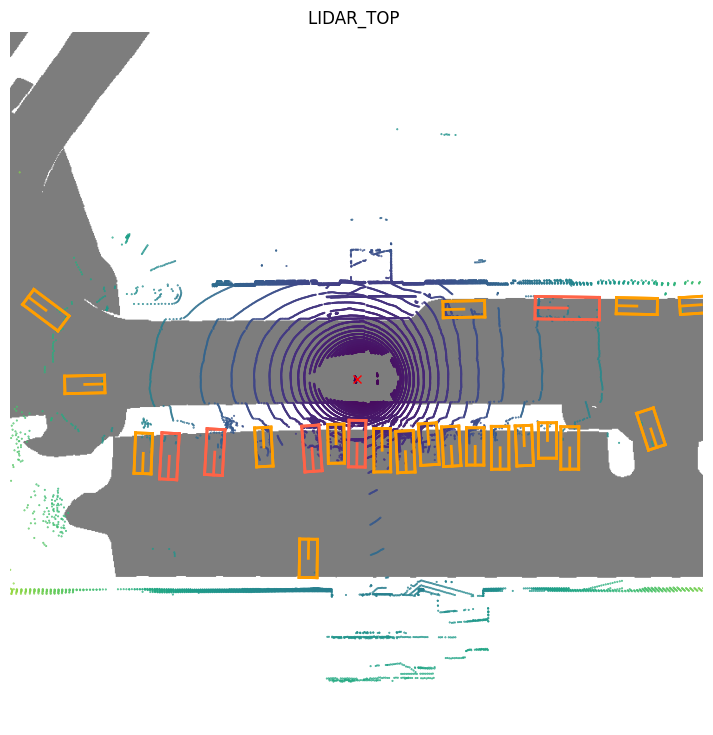

In [10]:
first_lidar_data = first_sample['data']['LIDAR_TOP']
nusc.render_sample_data(first_lidar_data)

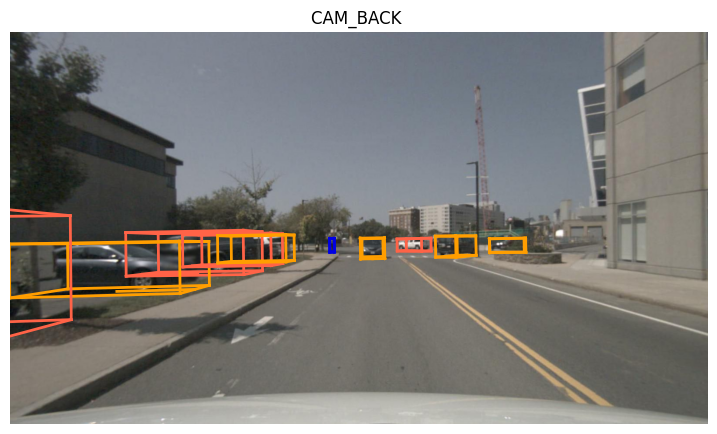

In [11]:
first_cam_back_data = first_sample['data']['CAM_BACK']
nusc.render_sample_data(first_cam_back_data)

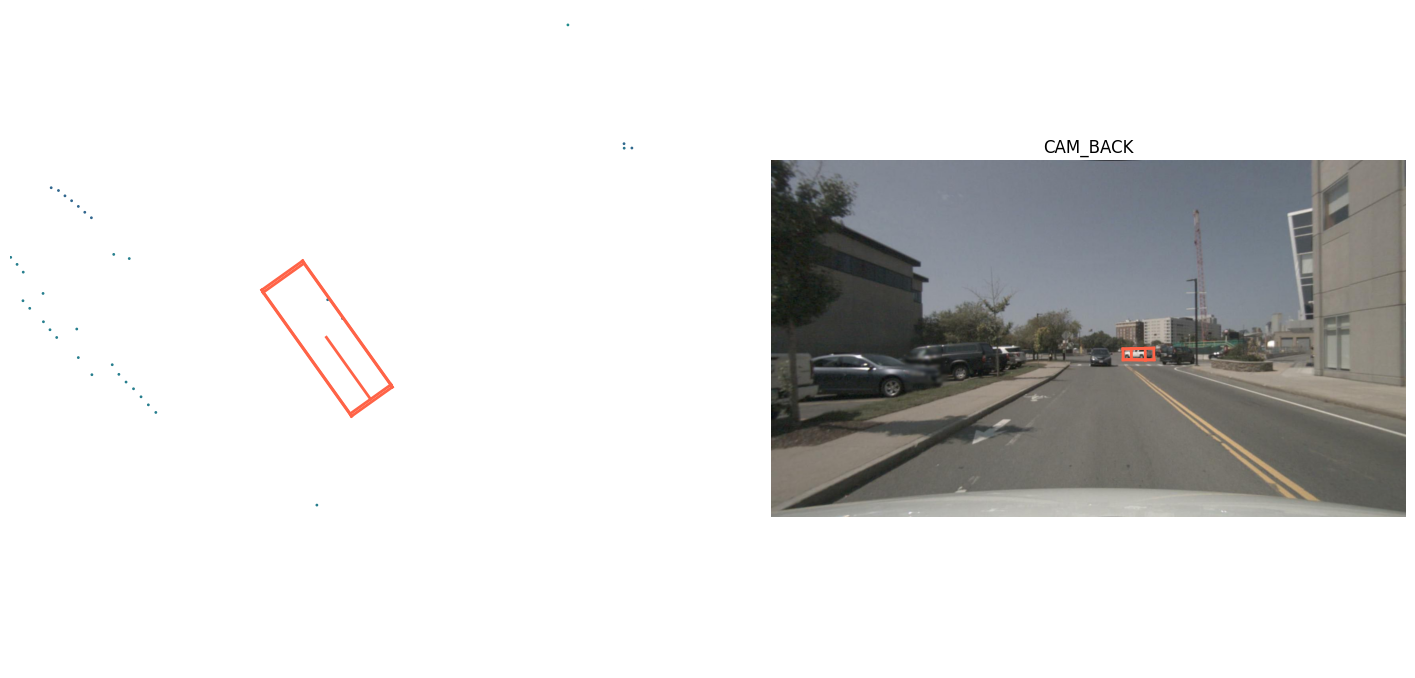

In [12]:
nusc.render_instance(instance['token'])